In [27]:
import torch
from torch import nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as T
from torch.utils.data import DataLoader

from torch import optim 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# image 28x28
input_size = 28
sequence_len = 28

n_layers = 2
batch_size = 32
hidden_size = 256
n_epochs = 3
n_classes = 10
lr = 1e-3

In [3]:
# load data
train_dataset = datasets.MNIST(root='dataset/', train=True, 
                               transform=T.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='dataset/', train=False, 
                              transform=T.ToTensor(), download=True)

In [4]:
train_loader = DataLoader(dataset=train_dataset, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(dataset=test_dataset, shuffle=True, batch_size=batch_size)

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
device

device(type='cpu')

In [7]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, sequence_len, 
                 n_layers, n_classes, device='cpu'):
        super(RNN, self).__init__()
        
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.n_layers = n_layers
        self.rnn = nn.RNN(input_size, hidden_size, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size * sequence_len, n_classes)
        
    def forward(self, x):
        # Initial hidden state
        h0 = torch.zeros(self.n_layers, x.size(0), self.hidden_size).to(device)
        
        out, _ = self.rnn(x, h0)
        out = out.reshape(out.shape[0], -1)
        
        out = self.fc(out)
        return out

In [ ]:
class RNN_GRU(nn.Module):
    

In [8]:
model = RNN(input_size, hidden_size, sequence_len, n_layers, n_classes).to(device)

In [9]:
optimizer = optim.Adadelta(model.parameters(), 1e-2)
criterion = nn.CrossEntropyLoss()

In [24]:
def get_accuracy(predicted, labels):   
    output = np.argmax(predicted, axis=1)
    return np.sum(output == labels) / float(labels.size)

In [34]:
def train(model, train_loader, n_epochs):
    losses = []
    accs = []
    for epoch in range(n_epochs):
    
        for (batch_idx, data) in enumerate(train_loader):
        
            inputs, targets = data
            inputs = inputs.squeeze(1)
        
            scores = model(inputs)
            loss = criterion(scores, targets)
        
            optimizer.zero_grad()
            loss.backward()
        
            optimizer.step()
        # tracking loss by epoch    
        losses.append(loss.item())
        
        # tracking accuracy by epoch
#         accuracy = get_accuracy(scores, targets)
#         accs.append(accuracy)
        
        print(f"Epoch #{epoch+1}; Loss is {loss.item()};")
        
    return losses

In [35]:
%%time
losses = train(model, train_loader, n_epochs=5)

Epoch #1; Loss is 0.33734554052352905;
Epoch #2; Loss is 0.04911458119750023;
Epoch #3; Loss is 0.0551624558866024;
Epoch #4; Loss is 0.19684165716171265;
Epoch #5; Loss is 0.16233281791210175;
CPU times: user 19min 6s, sys: 27.9 s, total: 19min 34s
Wall time: 15min 19s


In [32]:
def plot_loss(losses):
    plt.title("Loss history")
    plt.xlabel("# of epoch")
    plt.ylabel("loss")
    plt.plot(losses)
    plt.grid(True)
    plt.show()

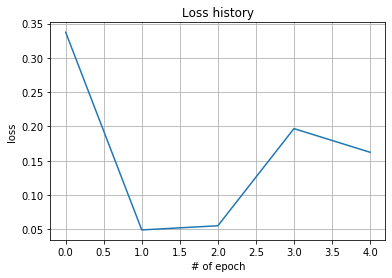

In [36]:
plot_loss(losses)